In [2]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW                     = "creditcard.csv"
CSV_DATASET_TRAIN                   = "dataset_train.csv"
CSV_DATASET_TEST                    = "dataset_test.csv"
CSV_DATASET_TRAIN_TRANSFORMED       = "dataset_train_t.csv"
CSV_DATASET_TEST_TRANSFORMED        = "dataset_test_t.csv"
CSV_DATASET_VAL_TRANSFORMED         = "dataset_val_t.csv"

CSV_DATASET_BALANCED_RUS_TRAIN      = "dataset_train_t_b_rus.csv"
CSV_DATASET_BALANCED_NM_TRAIN       = "dataset_train_t_b_nm.csv"
CSV_DATASET_BALANCED_SMOTE_TRAIN    = "dataset_train_t_b_smote.csv"
CSV_DATASET_BALANCED_ADASYN_TRAIN   = "dataset_train_t_b_adasyn.csv"
CSV_DATASET_BALANCED_TOMEK_TRAIN    = "dataset_train_t_b_tomek.csv"
CSV_DATASET_BALANCED_ENN_TRAIN      = "dataset_train_t_b_enn.csv"

CSV_DATASET_BALANCED_NM80_TOMEK30_TRAIN      = "dataset_train_t_b_nm80_tomek30.csv"
CSV_DATASET_BALANCED_NM65_TOMEK30_TRAIN      = "dataset_train_t_b_nm65_tomek30.csv"
CSV_DATASET_BALANCED_NM80_TOMEK50_TRAIN      = "dataset_train_t_b_nm80_tomek50.csv"
CSV_DATASET_BALANCED_NM90_TOMEK15_TRAIN      = "dataset_train_t_b_nm90_tomek15.csv"

if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [27]:
import pandas as pd
import numpy as np

from collections import Counter

%pip install imblearn

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import Dataset Test CSV
dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
print(f"dataset_rows = {dataset_val.shape[0]}")

X_test = dataset_val.drop(FEATURE_TARGET, axis=1)
y_test = dataset_val[FEATURE_TARGET]

dataset_rows = 199364


# Adaboost

## Decision Tree

d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.008
AUC-ROC: 0.965


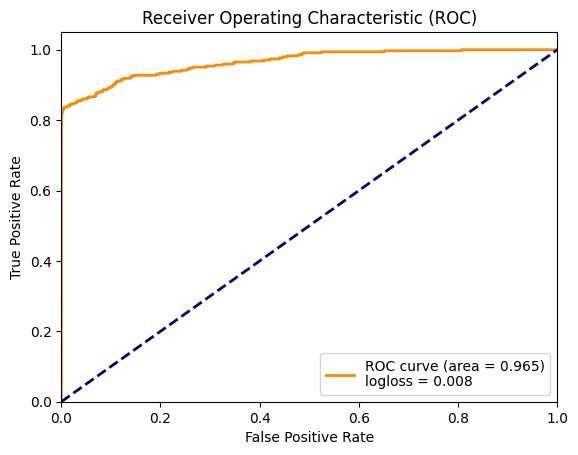

In [5]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]


class_weights = {0: 1, 1: CLASS_WEIGHT}
sample_weight = np.array([class_weights[cls] for cls in y_train])

base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train, sample_weight=sample_weight)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.109
AUC-ROC: 0.929


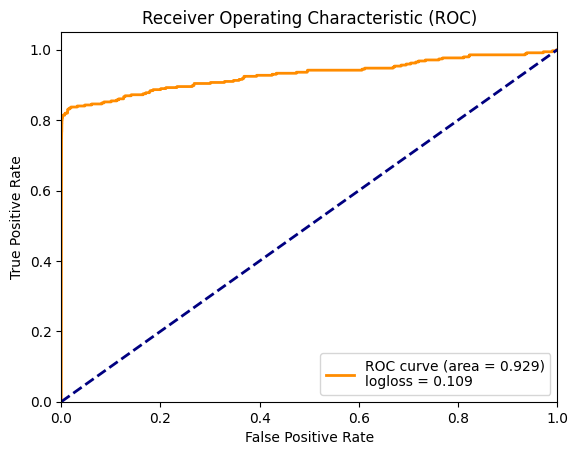

In [6]:
N_ESTIMATORS = 50
MAX_DEPTH = 3
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]


class_weights = {0: 1, 1: CLASS_WEIGHT}
sample_weight = np.array([class_weights[cls] for cls in y_train])

base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train, sample_weight=sample_weight)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.017
AUC-ROC: 0.947


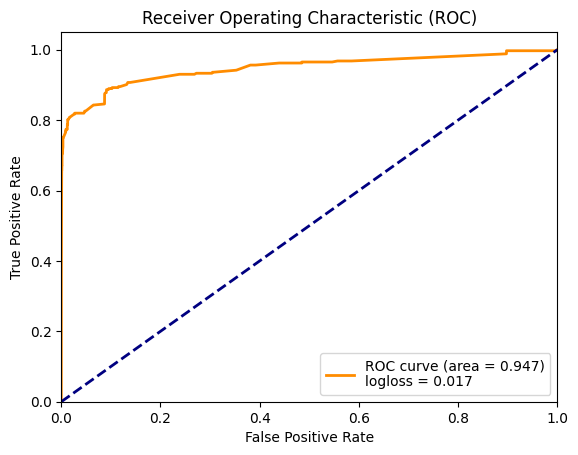

In [7]:
N_ESTIMATORS = 5
MAX_DEPTH = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]


class_weights = {0: 1, 1: CLASS_WEIGHT}
sample_weight = np.array([class_weights[cls] for cls in y_train])

base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train, sample_weight=sample_weight)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.199
AUC-ROC: 0.869


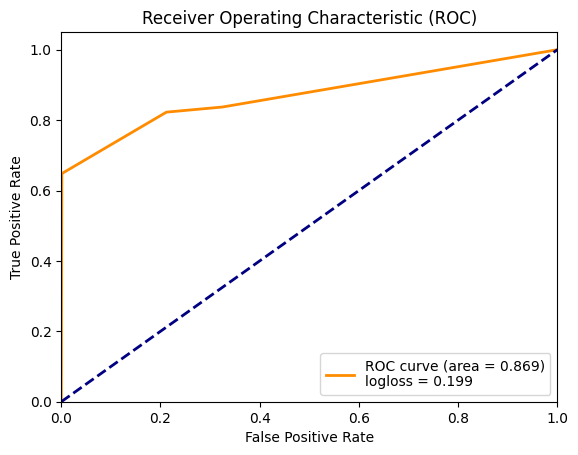

In [11]:
N_ESTIMATORS = 5
MAX_DEPTH = 15
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]


class_weights = {0: 1, 1: CLASS_WEIGHT}
sample_weight = np.array([class_weights[cls] for cls in y_train])

base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train, sample_weight=sample_weight)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression

d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.627
AUC-ROC: 0.928


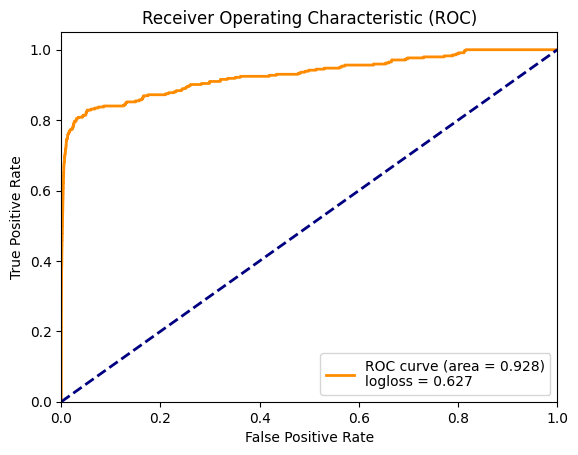

In [23]:
N_ESTIMATORS = 50
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = LogisticRegression(solver='liblinear')
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.564
AUC-ROC: 0.906


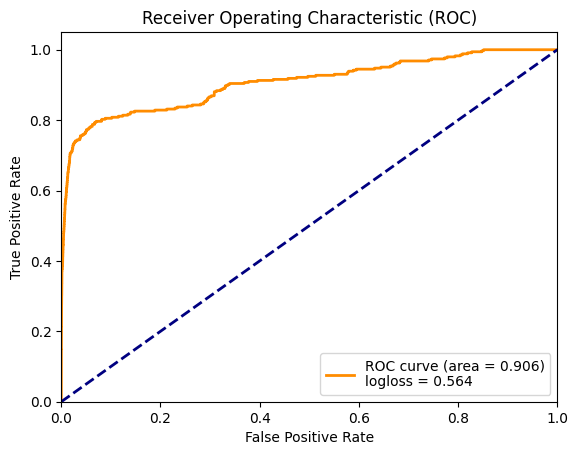

In [25]:
N_ESTIMATORS = 25
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = LogisticRegression(solver='liblinear')
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.274
AUC-ROC: 0.883


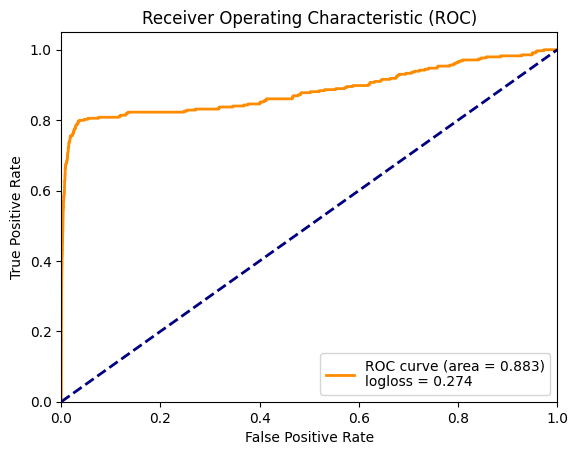

In [26]:
N_ESTIMATORS = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = LogisticRegression(solver='liblinear')
model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Bagging

## KNN

Log Loss: 0.039
AUC-ROC: 0.698


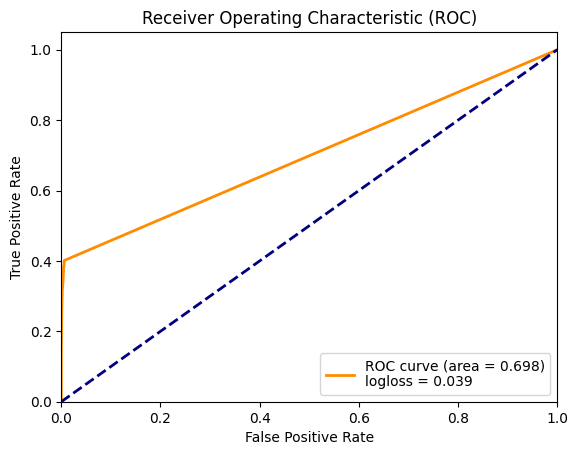

In [28]:
N_ESTIMATORS = 50
N_NEIGHBORS = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
model = BaggingClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.044
AUC-ROC: 0.659


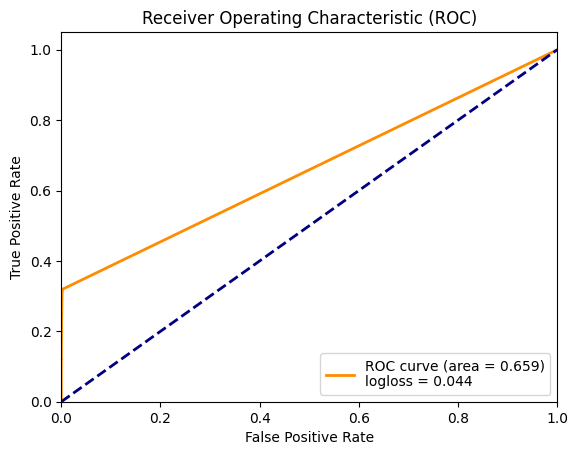

In [29]:
N_ESTIMATORS = 5
N_NEIGHBORS = 3
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
model = BaggingClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.035
AUC-ROC: 0.736


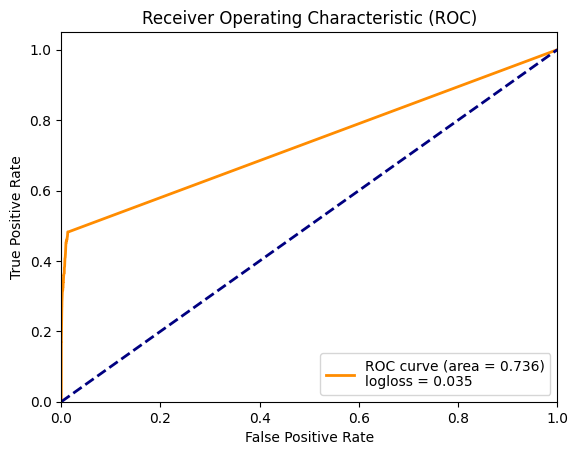

In [30]:
N_ESTIMATORS = 25
N_NEIGHBORS = 20
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



base_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
model = BaggingClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Random Forest

Log Loss: 0.087
AUC-ROC: 0.939


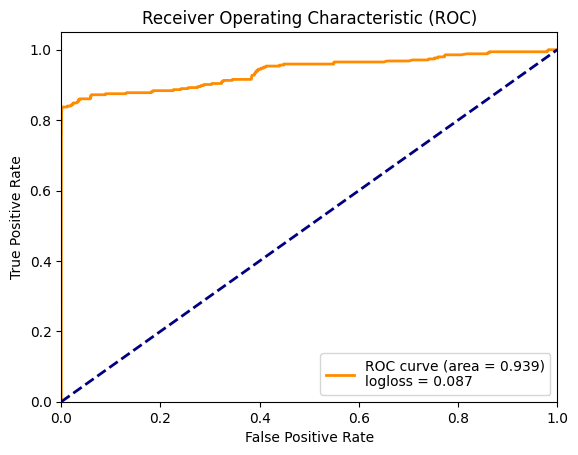

In [31]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.085
AUC-ROC: 0.928


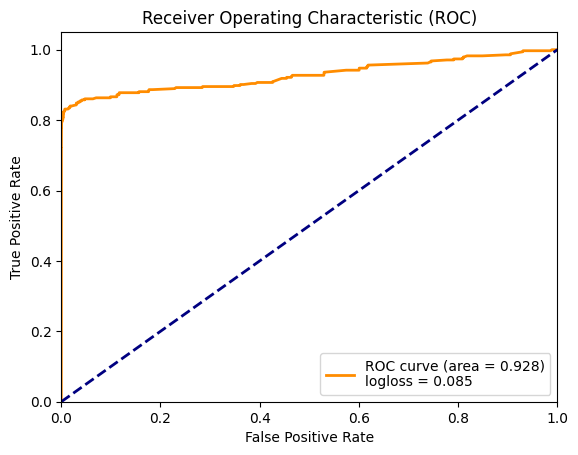

In [32]:
N_ESTIMATORS = 50
MAX_DEPTH = 3
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.031
AUC-ROC: 0.946


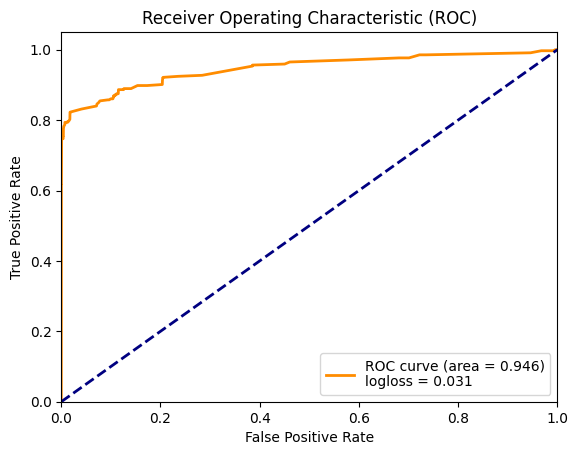

In [33]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.039
AUC-ROC: 0.942


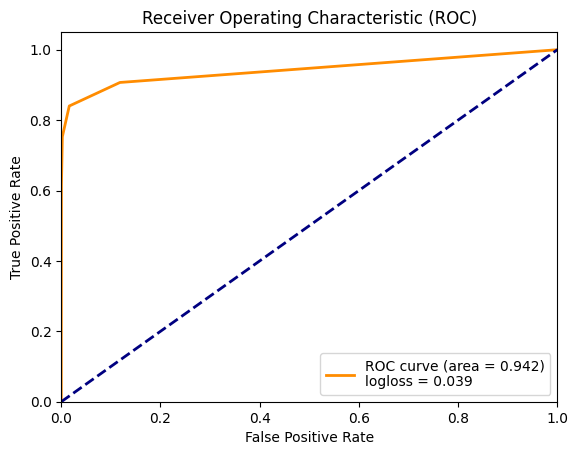

In [34]:
N_ESTIMATORS = 5
MAX_DEPTH = 15
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Log Loss: 0.023
AUC-ROC: 0.927


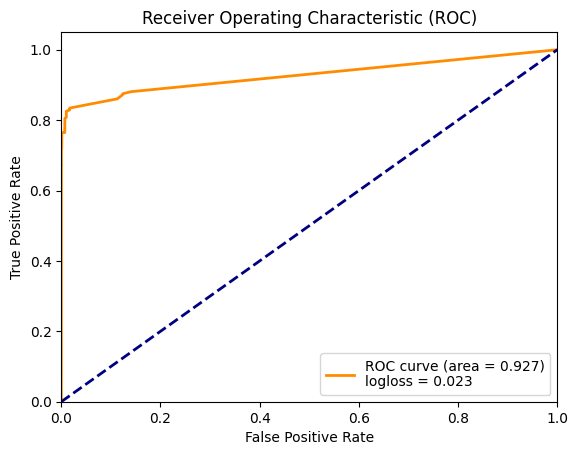

In [36]:
N_ESTIMATORS = 15
MAX_DEPTH = 1
CLASS_WEIGHT = 1

# Import Balanced CSV
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED)

X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]



model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
model.fit(X_train, y_train)





y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.3f}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.3f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
